In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [6]:
# Function to Read crypto Data - using the yfinance package
def get_crypto_data(crypto_symbol):
    # Calculate start and end dates
    end_date = datetime.today()
    start_date = end_date - timedelta(days=20*365)  # Approximation for 10 years
    
    # Fetch data using yfinance
    data = yf.download(f"{crypto_symbol}-USD", start=start_date, end=end_date)
    
    return data

In [7]:
BTC = get_crypto_data("BTC")

[*********************100%***********************]  1 of 1 completed


In [8]:
BTC['ret']= BTC['Adj Close'].pct_change()

In [10]:
GLD = yf.download("GLD", start='2014-09-17',end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [11]:
GLD['ret']= GLD['Adj Close'].pct_change()

In [12]:
GLD.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2014-09-17,118.949997,119.239998,117.500000,117.540001,117.540001,8328700,NaN
2014-09-18,117.410004,118.089996,117.190002,117.779999,117.779999,5368700,0.002042
2014-09-19,117.510002,117.570000,116.720001,117.089996,117.089996,10930200,-0.005858
2014-09-22,116.720001,117.370003,116.580002,116.849998,116.849998,7601600,-0.002050
2014-09-23,117.989998,117.989998,117.309998,117.599998,117.599998,4664800,0.006418


In [13]:
# Merge the two dataframes on the Date index
returns = pd.merge(BTC[['ret']], GLD[['ret']], left_index=True, right_index=True, suffixes=('_BTC', '_GLD'))

# Rename the columns to BTC_ret and GLD_ret
returns.rename(columns={'ret_BTC': 'BTC_ret', 'ret_GLD': 'GLD_ret'}, inplace=True)

# Display the resulting dataframe
returns.head()

,BTC_ret,GLD_ret
Date,,
2014-09-17,NaN,NaN
2014-09-18,-0.071926,0.002042
2014-09-19,-0.069843,-0.005858
2014-09-22,0.008352,-0.002050
2014-09-23,0.083647,0.006418


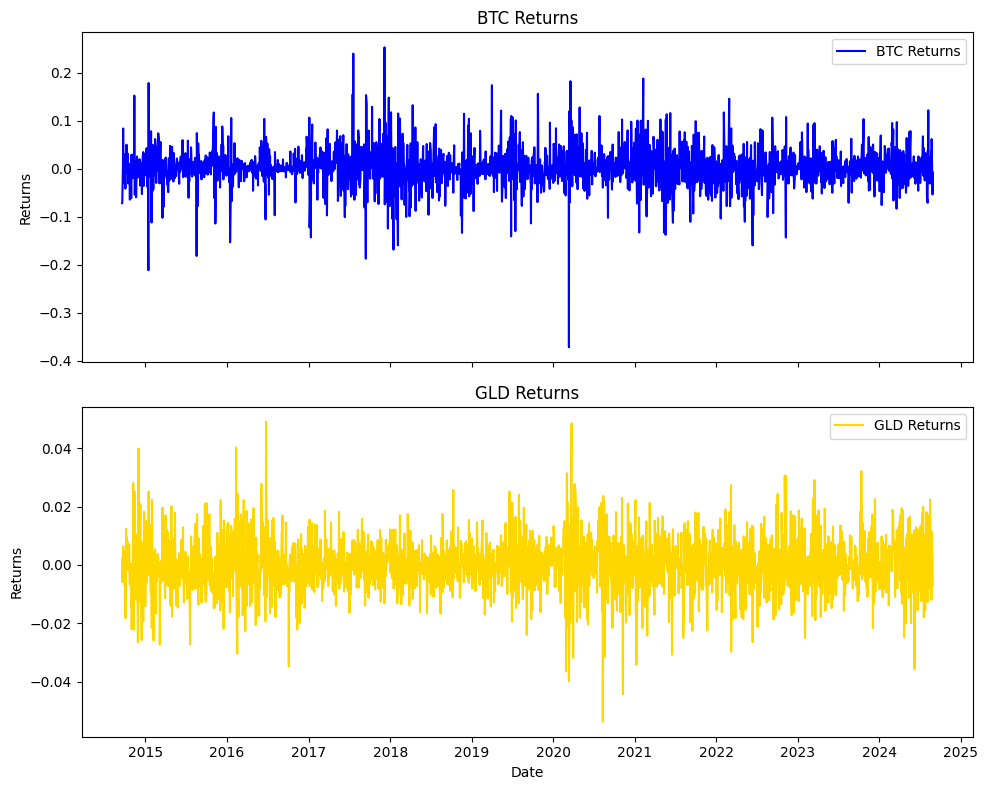

In [14]:
# Create a figure and two subplots (one for each DataFrame)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot BTC returns
ax1.plot(returns.index, returns['BTC_ret'], label='BTC Returns', color='blue')
ax1.set_title('BTC Returns')
ax1.set_ylabel('Returns')
ax1.legend()

# Plot GLD returns
ax2.plot(returns.index, returns['GLD_ret'], label='GLD Returns', color='gold')
ax2.set_title('GLD Returns')
ax2.set_ylabel('Returns')
ax2.legend()

# Set common labels
ax2.set_xlabel('Date')

# Tight layout to improve spacing between plots
plt.tight_layout()

# Display the plot
plt.show()

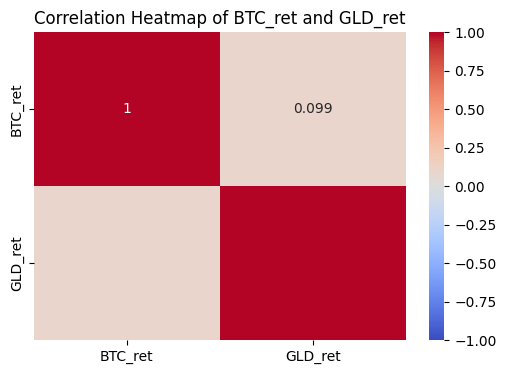

In [15]:
# Compute the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Heatmap of BTC_ret and GLD_ret')

# Show the plot
plt.show()


In [16]:
print(correlation_matrix)

          BTC_ret   GLD_ret
BTC_ret  1.000000  0.098911
GLD_ret  0.098911  1.000000


[*********************100%***********************]  3 of 3 completed
C:\Users\spsk9\AppData\Local\Temp\ipykernel_13396\2320170192.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


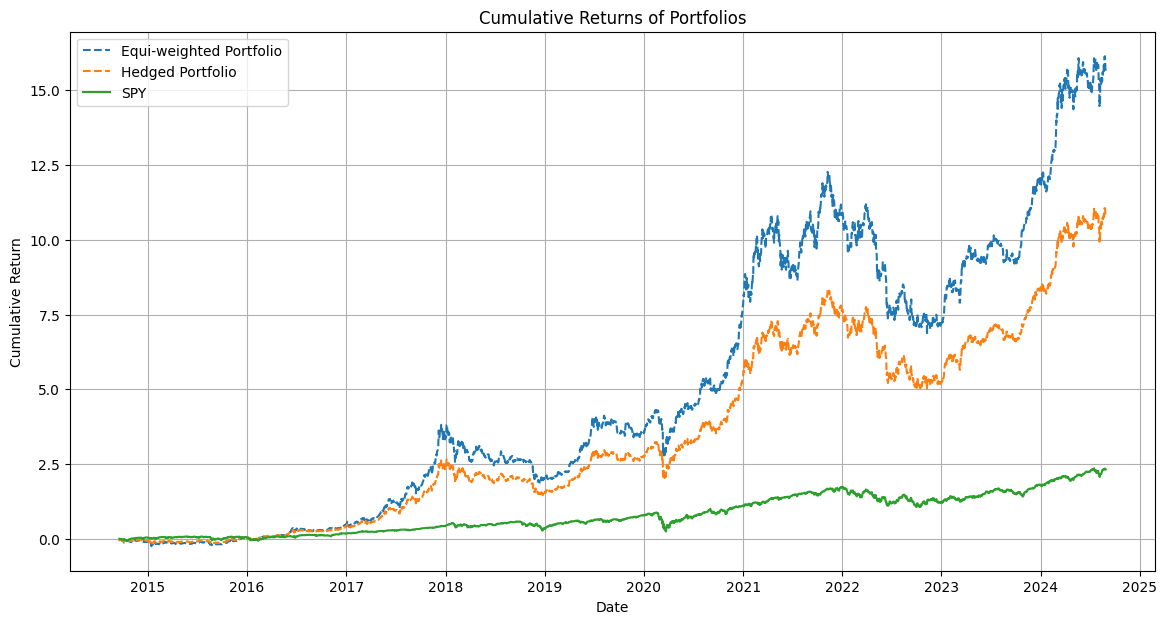

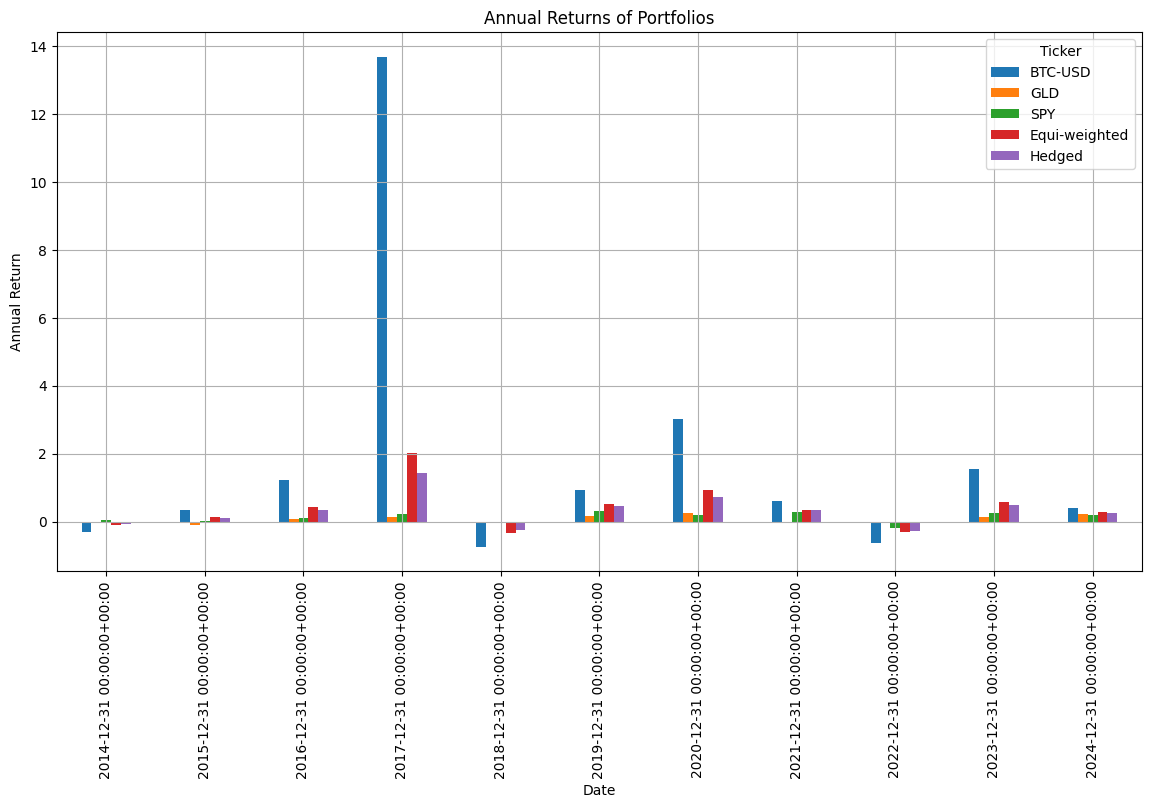

In [3]:
# Fetch historical data for BTC, GLD, SPY from 2014-09-17 till today
tickers = ['BTC-USD', 'GLD', 'SPY']
start_date = '2014-09-17'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute daily returns
daily_returns = data.pct_change().dropna()

# Compute cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Portfolio 1: Equally weighted portfolio (33.33% in each asset)
weights_eq = np.array([1/3, 1/3, 1/3])
daily_returns_eq = daily_returns.dot(weights_eq)
cumulative_returns_eq = (1 + daily_returns_eq).cumprod() - 1

# Portfolio 2: Hedged portfolio (50% SPY, 25% BTC, 25% GLD)
weights_hedged = np.array([0.25, 0.25, 0.5])
daily_returns_hedged = daily_returns.dot(weights_hedged)
cumulative_returns_hedged = (1 + daily_returns_hedged).cumprod() - 1

# Adding the portfolios to the cumulative returns DataFrame
cumulative_returns['Equi-weighted'] = cumulative_returns_eq
cumulative_returns['Hedged'] = cumulative_returns_hedged
cumulative_returns['SPY'] = cumulative_returns['SPY']

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns.index, cumulative_returns['Equi-weighted'], label='Equi-weighted Portfolio', linestyle='--')
plt.plot(cumulative_returns.index, cumulative_returns['Hedged'], label='Hedged Portfolio', linestyle='--')
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY', linestyle='-')
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Compute annual returns
annual_returns = daily_returns.resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_returns['Equi-weighted'] = daily_returns_eq.resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_returns['Hedged'] = daily_returns_hedged.resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_returns['SPY'] = annual_returns['SPY']

# Plot annual returns
annual_returns.plot(kind='bar', figsize=(14, 7), title='Annual Returns of Portfolios')
plt.ylabel('Annual Return')
plt.grid(True)
plt.show()


In [10]:
# Calculate the final cumulative return for each portfolio and SPY
final_cumulative_returns = cumulative_returns.iloc[-1]

# Print the final cumulative returns
print(f"Final cumulative return for Equi-weighted Portfolio: {final_cumulative_returns['Equi-weighted'] * 100:.2f}%")
print(f"Final cumulative return for Hedged Portfolio: {final_cumulative_returns['Hedged'] * 100:.2f}%")
print(f"Final cumulative return for SPY: {final_cumulative_returns['SPY'] * 100:.2f}%")

# Difference in final cumulative returns (absolute)
difference_final_eq = final_cumulative_returns['Equi-weighted'] - final_cumulative_returns['SPY']
difference_final_hedged = final_cumulative_returns['Hedged'] - final_cumulative_returns['SPY']

# Print the final return differences
print(f"Difference in final cumulative returns (Equi-weighted - SPY): {difference_final_eq * 100:.2f}%")
print(f"Difference in final cumulative returns (Hedged - SPY): {difference_final_hedged * 100:.2f}%")

# Calculate average daily return for each portfolio and SPY
average_daily_return_eq = daily_returns_eq.mean()
average_daily_return_hedged = daily_returns_hedged.mean()
average_daily_return_spy = daily_returns['SPY'].mean()

# Convert to annualized returns
average_annual_return_eq = average_daily_return_eq * 252
average_annual_return_hedged = average_daily_return_hedged * 252
average_annual_return_spy = average_daily_return_spy * 252

# Print the average annualized returns
print(f"Average annualized return for Equi-weighted Portfolio: {average_annual_return_eq * 100:.2f}%")
print(f"Average annualized return for Hedged Portfolio: {average_annual_return_hedged * 100:.2f}%")
print(f"Average annualized return for SPY: {average_annual_return_spy * 100:.2f}%")

# Calculate the average annualized return differences
average_annual_diff_eq = average_annual_return_eq - average_annual_return_spy
average_annual_diff_hedged = average_annual_return_hedged - average_annual_return_spy

# Print the average annualized return differences
print(f"Average annualized return difference (Equi-weighted - SPY): {average_annual_diff_eq * 100:.2f}%")
print(f"Average annualized return difference (Hedged - SPY): {average_annual_diff_hedged * 100:.2f}%")



Final cumulative return for Equi-weighted Portfolio: 1561.59%
Final cumulative return for Hedged Portfolio: 1076.46%
Final cumulative return for SPY: 232.26%
Difference in final cumulative returns (Equi-weighted - SPY): 1329.33%
Difference in final cumulative returns (Hedged - SPY): 844.20%
Average annualized return for Equi-weighted Portfolio: 21.84%
Average annualized return for Hedged Portfolio: 18.73%
Average annualized return for SPY: 9.41%
Average annualized return difference (Equi-weighted - SPY): 12.43%
Average annualized return difference (Hedged - SPY): 9.32%


In [9]:
# Calculate the daily volatility (standard deviation) of the portfolios
daily_volatility_eq = daily_returns_eq.std()
daily_volatility_hedged = daily_returns_hedged.std()
daily_volatility_spy = daily_returns['SPY'].std()

# Annualize the volatility
annualized_volatility_eq = daily_volatility_eq * np.sqrt(252)
annualized_volatility_hedged = daily_volatility_hedged * np.sqrt(252)
annualized_volatility_spy = daily_volatility_spy * np.sqrt(252)

# Print the results
print(f"Annualized Volatility of Equi-weighted Portfolio: {annualized_volatility_eq * 100:.2f}%")
print(f"Annualized Volatility of Hedged Portfolio: {annualized_volatility_hedged * 100:.2f}%")
print(f"Annualized Volatility of SPY: {annualized_volatility_spy * 100:.2f}%")


Annualized Volatility of Equi-weighted Portfolio: 21.56%
Annualized Volatility of Hedged Portfolio: 17.98%
Annualized Volatility of SPY: 14.67%
